<a href="https://colab.research.google.com/github/Pa1kalyanv/Research-Work/blob/main/Protecting_Children_from_Harmful_Audio_Content_Automated_Profanity_Detection_From_English_Audio_in_Songs_and_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.4 MB/s eta 0:00:00


In [ ]:
import whisper

model = whisper.load_model("large")

100%|█████████████████████████████████████| 2.87G/2.87G [00:49<00:00, 62.2MiB/s]


In [ ]:
model.device

device(type='cuda', index=0)

In [ ]:
from IPython.display import Audio
Audio("/content/F10.mp3")

In [ ]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("/content/F10.mp3")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
result.text

Detected language: en


'Shit, piss, fuck, cunt, cock, sucker, motherfucker, tits, fart, turd, and twat. Shit, piss, fuck, cunt, cock, sucker, motherfucker, tits, fart, turd, and twat. Shit, piss, fuck, cunt, cock, sucker, motherfucker, tits, fart, turd, and twat. Shit, piss, fuck, cunt, cock, sucker, motherfucker, tits, fart, turd, and twat.'

In [ ]:
import csv

lyrics = result.text
lyrics_list = lyrics.split()

with open('F10.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Lyrics'])
    for word in lyrics_list:
        writer.writerow([word])

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 113.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModel

# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load the BERT encoder
encoder = AutoModel.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
!pip install sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=5610d79fcb73f907b2b43333517c9d1f461e08b5406876c26afe2c611396d2ea
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


TFDIf

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# load data
df1 = pd.read_csv('/content/F10.csv')
df2 = pd.read_csv('/content/bad-words.csv')

# preprocess text
stop_words = set(nltk.corpus.stopwords.words('english'))
stemmer = nltk.stem.PorterStemmer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

df1['Lyrics'] = df1['Lyrics'].apply(preprocess)
df2['Badwords'] = df2['Badwords'].apply(preprocess)

# compute similarity
vectorizer = TfidfVectorizer()
tfidf1 = vectorizer.fit_transform(df1['Lyrics'])
tfidf2 = vectorizer.transform(df2['Badwords'])

similarity_matrix = cosine_similarity(tfidf1, tfidf2)

# calculate similarity percentage
similarity_percentage = similarity_matrix * 100

# save results
similarity_df = pd.DataFrame(similarity_percentage, index=df1['Lyrics'], columns=df2['Badwords'])
#similarity_df.to_csv('similarity_percentage.csv')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load CSV files
df1 = pd.read_csv("/content/F10.csv")
df2 = pd.read_csv("/content/bad-words.csv")

# Combine text columns from both files into a list
docs = df1['Lyrics'].tolist() + df2['Badwords'].tolist()

# Tokenize documents
stop_words = set(stopwords.words('english'))
docs = [' '.join([word.lower() for word in word_tokenize(doc) if word.lower() not in stop_words]) for doc in docs]

# Vectorize documents using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs)

# Get vector representation of documents
vectors1 = tfidf_matrix[:len(df1)]
vectors2 = tfidf_matrix[len(df1):]

# Calculate cosine similarity between documents
similarity = cosine_similarity(vectors1, vectors2)
# calculate similarity percentage
similarity_percentage = similarity_matrix * 100

# save results
similarity_df = pd.DataFrame(similarity_percentage, index=df1['Lyrics'], columns=df2['Badwords'])
similarity_df.to_csv('similarity_percentage1.csv')

# save results
#similarity_df = pd.DataFrame(similarity_percentage, index=docs[:len(df1)], columns=docs[len(df1):])
#similarity_df.to_csv('similarity_percentage111.csv')


# Find matching words
matching_words = []
for i in range(len(df1)):
    doc1 = df1.loc[i, 'Lyrics']
    doc2 = df2.loc[similarity[i].argmax(), 'Badwords']
    words1 = set([word.lower() for word in word_tokenize(doc1) if word.lower() not in stop_words])
    words2 = set([word.lower() for word in word_tokenize(doc2) if word.lower() not in stop_words])
    common_words = words1.intersection(words2)
    matching_words.append(common_words)

# Print matching words
for i in range(len(df1)):
    print(f"Matching words in document {i+1}: {matching_words[i]}")

total_matches_1 = sum([len(words) for words in matching_words])
print("Total number of matching words: ", total_matches_1)


Matching words in document 1: {'shit'}
Matching words in document 2: {'piss'}
Matching words in document 3: {'fuck'}
Matching words in document 4: {'cunt'}
Matching words in document 5: {'cock'}
Matching words in document 6: {'sucker'}
Matching words in document 7: {'motherfucker'}
Matching words in document 8: {'tits'}
Matching words in document 9: {'fart'}
Matching words in document 10: {'turd'}
Matching words in document 11: set()
Matching words in document 12: {'twat'}
Matching words in document 13: {'shit'}
Matching words in document 14: {'piss'}
Matching words in document 15: {'fuck'}
Matching words in document 16: {'cunt'}
Matching words in document 17: {'cock'}
Matching words in document 18: {'sucker'}
Matching words in document 19: {'motherfucker'}
Matching words in document 20: {'tits'}
Matching words in document 21: {'fart'}
Matching words in document 22: {'turd'}
Matching words in document 23: set()
Matching words in document 24: {'twat'}
Matching words in document 25: {'sh

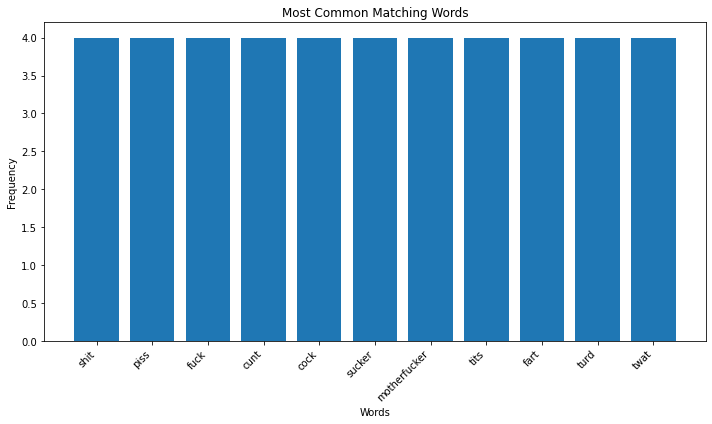

In [ ]:
import matplotlib.pyplot as plt

# Combine all matching words into a single list
all_matching_words = [word for words in matching_words for word in words]

# Count the frequency of each word
word_counts = {}
for word in all_matching_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sort the words by frequency
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Plot the top 20 words by frequency
plt.figure(figsize=(10, 6))
plt.bar([w[0] for w in sorted_words[:20]], [w[1] for w in sorted_words[:20]])
plt.title("Most Common Matching Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Get the total number of words in df1
total_words_df1 = sum([len(df1)])

# Calculate the matching words percentage in df1
matching_words_percentage_df1 = total_matches_1 / total_words_df1 * 100

print("Matching words percentage in df1: ", matching_words_percentage_df1)


Matching words percentage in df1:  91.66666666666666


BERT

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Load CSV files
df1 = pd.read_csv("/content/F10.csv")
df2 = pd.read_csv("/content/bad-words.csv")

# Combine text columns from both files into a list
docs = df1['Lyrics'].tolist() + df2['Badwords'].tolist()

# Tokenize and encode documents
encoded_inputs = tokenizer(docs, padding=True, truncation=True, return_tensors="pt")

# Generate document embeddings with BERT model
with torch.no_grad():
    outputs = model(**encoded_inputs)
    embeddings = outputs.pooler_output

# Split document embeddings back into separate files
num_docs1 = len(df1)
embeddings1 = embeddings[:num_docs1]
embeddings2 = embeddings[num_docs1:]

# Calculate cosine similarity between documents
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(embeddings1, embeddings2)
print(similarity)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[0.9637196  0.8629608  0.86305696 ... 0.8170501  0.93602115 0.8477728 ]
 [0.973053   0.89211935 0.89023376 ... 0.8485235  0.9557698  0.8817879 ]
 [0.95798826 0.8581263  0.8600516  ... 0.8116789  0.92983115 0.8414952 ]
 ...
 [0.97094    0.8953179  0.89307606 ... 0.8453095  0.9485086  0.87323487]
 [0.9042126  0.980088   0.9734628  ... 0.9739686  0.9332801  0.96009725]
 [0.97390604 0.9542787  0.9529636  ... 0.9168742  0.9677216  0.92842454]]


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load CSV files
df3 = pd.read_csv("/content/F10.csv")
df4 = pd.read_csv("/content/bad-words.csv")

# Combine text columns from both files into a list
docs = df3['Lyrics'].tolist() + df4['Badwords'].tolist()

# Concatenate text strings in docs list
docs = [" ".join(word_tokenize(doc.lower())) for doc in docs]

# Create sentence transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Get vector representation of documents
doc_embeddings = model.encode(docs)

# Calculate cosine similarity between documents
similarity = cosine_similarity(doc_embeddings[:len(df1)], doc_embeddings[len(df1):])

# Find matching words
stop_words = set(stopwords.words('english'))
matching_words = []
for i in range(len(df1)):
    doc3 = df3.loc[i, 'Lyrics']
    doc4 = df4.loc[similarity[i].argmax(), 'Badwords']
    words1 = set([word.lower() for word in word_tokenize(doc3) if word.lower() not in stop_words])
    words2 = set([word.lower() for word in word_tokenize(doc4) if word.lower() not in stop_words])
    common_words = words1.intersection(words2)
    matching_words.append(common_words)

matching_words1 = []
for i in range(len(df1)):
    doc3 = df3.loc[i, 'Lyrics']
    doc4 = df4.loc[similarity[i].argmax(), 'Badwords']
    words1 = set([word.lower() for word in word_tokenize(doc3) if word.lower() not in stop_words])
    words2 = set([word.lower() for word in word_tokenize(doc4) if word.lower() not in stop_words])
    common_words = words1.intersection(words2)
    matching_words1.append(common_words)

# Print matching words
for i in range(len(df3)):
    print(f"Matching words in document {i+1}: {matching_words1[i]}")

total_matches_2 = sum([len(words) for words in matching_words1])
print("Total number of matching words: ", total_matches_2)


Matching words in document 1: {'shit'}
Matching words in document 2: {'piss'}
Matching words in document 3: {'fuck'}
Matching words in document 4: {'cunt'}
Matching words in document 5: {'cock'}
Matching words in document 6: {'sucker'}
Matching words in document 7: {'motherfucker'}
Matching words in document 8: {'tits'}
Matching words in document 9: {'fart'}
Matching words in document 10: {'turd'}
Matching words in document 11: set()
Matching words in document 12: {'twat'}
Matching words in document 13: {'shit'}
Matching words in document 14: {'piss'}
Matching words in document 15: {'fuck'}
Matching words in document 16: {'cunt'}
Matching words in document 17: {'cock'}
Matching words in document 18: {'sucker'}
Matching words in document 19: {'motherfucker'}
Matching words in document 20: {'tits'}
Matching words in document 21: {'fart'}
Matching words in document 22: {'turd'}
Matching words in document 23: set()
Matching words in document 24: {'twat'}
Matching words in document 25: {'sh

In [ ]:
# Get the total number of words in df1
total_words_df3 = sum([len(df3)])

# Calculate the matching words percentage in df1
matching_words_percentage_df2 = total_matches_2 / total_words_df3 * 100

print("Matching words percentage in df2: ", matching_words_percentage_df2)


Matching words percentage in df2:  91.66666666666666


DOC2VEC

In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# Load CSV files
df5 = pd.read_csv("/content/F10.csv")
df6 = pd.read_csv("/content/bad-words.csv")

# Combine text columns from both files into a list
docs3 = df5['Lyrics'].tolist() + df6['Badwords'].tolist()

# Tokenize documents and create tagged documents
tagged_docs = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(docs)]

# Train Doc2Vec model
model = Doc2Vec(tagged_docs, vector_size=20, min_count=1, epochs=100)

# Get vector representation of documents
vectors3 = [model.infer_vector(word_tokenize(doc.lower())) for doc in df5['Lyrics']]
vectors4 = [model.infer_vector(word_tokenize(doc.lower())) for doc in df6['Badwords']]

# Calculate cosine similarity between documents
#from sklearn.metrics.pairwise import cosine_similarity
#similarity = cosine_similarity(vectors1, vectors2)
#print(similarity)

# Calculate cosine similarity between documents
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors3, vectors4)

# Count the number of matching words
total_matches = 0
for i in range(len(df5)):
    doc5 = df5.loc[i, 'Lyrics']
    doc6 = df6.loc[similarity[i].argmax(), 'Badwords']
    common_words = set(word_tokenize(doc5.lower())).intersection(set(word_tokenize(doc6.lower())))
    #print("Number of matching words between doc1 and the most similar doc2: ", len(common_words))
    total_matches_3 += len(common_words)
print("Total number of matching words: ", total_matches_3)


Total number of matching words:  16


In [ ]:
# Find matching words
matching_words = []
for i in range(len(df5)):
    doc5 = df5.loc[i, 'Lyrics']
    doc6 = df6.loc[similarity[i].argmax(), 'Badwords']
    words1 = set(word_tokenize(doc5.lower()))
    words2 = set(word_tokenize(doc6.lower()))
    common_words = words1.intersection(words2)
    matching_words.append(common_words)

# Print matching words
for i in range(len(df5)):
    print(f"Matching words in document {i+1}: {matching_words[i]}")

total_matches_3 = sum([len(words) for words in matching_words])
print("Total number of matching words: ", total_matches_3)

Matching words in document 1: {'shit'}
Matching words in document 2: {'piss'}
Matching words in document 3: {'fuck'}
Matching words in document 4: {'cunt'}
Matching words in document 5: {'cock'}
Matching words in document 6: {'sucker'}
Matching words in document 7: {'motherfucker'}
Matching words in document 8: {'tits'}
Matching words in document 9: {'fart'}
Matching words in document 10: {'turd'}
Matching words in document 11: set()
Matching words in document 12: {'twat'}
Matching words in document 13: {'shit'}
Matching words in document 14: {'piss'}
Matching words in document 15: {'fuck'}
Matching words in document 16: {'cunt'}
Matching words in document 17: {'cock'}
Matching words in document 18: {'sucker'}
Matching words in document 19: {'motherfucker'}
Matching words in document 20: {'tits'}
Matching words in document 21: {'fart'}
Matching words in document 22: {'turd'}
Matching words in document 23: set()
Matching words in document 24: {'twat'}
Matching words in document 25: {'sh

In [ ]:
# Get the total number of words in df1
total_words_df5 = sum([len(df5)])

# Calculate the matching words percentage in df1
matching_words_percentage_df2 = total_matches_3 / total_words_df5 * 100

print("Matching words percentage in df2: ", matching_words_percentage_df2)


Matching words percentage in df2:  91.66666666666666


PERCENTAGE

In [ ]:
def profanity_level(percentage):
    if percentage <= 15:
        return "normal"
    elif percentage <= 30:
        return "low profanity"
    elif percentage <= 50:
        return "mid-level profanity"
    else:
        return "high profanity"


In [ ]:
percentage = max(matching_words_percentage_df1, matching_words_percentage_df2, matching_words_percentage_df3)
profanity = profanity_level(percentage)
print(f"The percentage {percentage}% is categorized as {profanity}.")


The percentage 91.66666666666666% is categorized as high profanity.
